![Image_png](Image.png)

# Step 1: Define the Problem or Research Question

**Reserch Question:**

"Can we predict whether a patient will be readmitted within 30 days of discharge based on hospital records and patient details?"

**Project Objective:**

 - Identify key factors associated with patient readmissions.

 - Build a classification model to predict readmission.

 - Provide actionable insights to reduce readmission rates.

# Step 2: Collect the Data

**Dataset:**

Name: Hospital Readmission Prediction (Synthetic)

Source: Kaggle

Type: Synthetic (no privacy issues)

Format: CSV

# Load_the_All_required_Libraries

In [46]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


# Load_the_Data

In [47]:
# Load the data
df = pd.read_csv('hospital_readmissions_30k.csv')

# Previews
df.head(10)

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No
5,6,75,Female,139/100,194,33.5,No,Yes,0,10,Home,No
6,7,47,Male,139/79,168,27.1,No,Yes,5,8,Home,No
7,8,18,Other,153/81,210,26.3,No,No,5,2,Home,No
8,9,68,Male,111/76,218,30.4,No,Yes,3,8,Home,No
9,10,23,Female,142/72,186,21.3,No,No,3,3,Home,No


**Observation:**

- Columns include 'patient_id', 'age', 'gender', 'blood_pressure', 'cholesterol', 'bmi',
                  'diabetes', 'hypertension', 'medication_count', 'length_of_stay',
                  'discharge_destination'.
                
- Target Columns is 'readmitted_30_days'

------------------------------------------------------------------------------------------------
**Columns Details:**

1. blood_pressure

🔹 This shows the patient's blood pressure as systolic/diastolic (like 130/72).

🔹 It helps measure how much pressure the blood is putting on artery walls.

🔹 Example:

130/72 → normal

139/100 → high blood pressure

--------------------------------------------------------------------------------------------------
 2. cholesterol

🔹 This is the amount of cholesterol (fat) in the patient’s blood (measured in mg/dL).

🔹 High cholesterol can lead to heart problems.

🔹 Example:

240 → high

153, 205 → normal or moderate

-------------------------------------------------------------------------------------------------------
 3. bmi (Body Mass Index)

🔹 A number based on the patient's height and weight.

🔹 It tells if the patient is underweight, normal, overweight, or obese.

🔹 Example:


18.4 → underweight

25-29 → overweight

30+ → obese

-----------------------------------------------------------------------------------------------------------------------
 4. diabetes

🔹 Shows if the patient has diabetes.

🔹 Values:


Yes → patient has diabetes

No → patient does not have diabetes

-------------------------------------------------------------------------------------------------------------------------
 5. hypertension

🔹 Tells if the patient has high blood pressure.

🔹 Values:

Yes → patient has hypertension

No → patient does not have it

-------------------------------------------------------------------------------------------------------------------------
 6. medication_count
🔹 The number of different medicines the patient is taking.
🔹 Example:

0 → no medicines

5 → taking 5 different medicines

-----------------------------------------------------------------------------------------------------------------------------
 7. length_of_stay
🔹 The number of days the patient stayed in the hospital.
🔹 Example:

1, 3, 10 → patient stayed for 1, 3, or 10 days

-----------------------------------------------------------------------------------------------------------------------------
 8. discharge_destination

🔹 Where the patient went after leaving the hospital.

🔹 Example:

Home → went home

Nursing_Facility → went to a care center or nursing home

Rehab → Patient went to a rehabilitation center to recover or continue treatment (e.g., after surgery, injury, or illness).

------------------------------------------------------------------------------------------------------------------------------
 9. readmitted_30_days

🔹 This shows if the patient came back to the hospital within 30 days after discharge.

🔹 It is the target column for prediction.

🔹 Values:

Yes → readmitted

No → not readmitted

---------------------------------

# Step3 Data Cleaning

### Check Basic Info

In [48]:
# Check Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  int64  
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       30000 non-null  int64  
 9   length_of_stay         30000 non-null  int64  
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.7+ MB


**Observation:**

- All 30,000 rows are non-null

- 6 categorical Columns(object type), 5 numerical columns and 1 float(bmi)

### Check Null Values In columns

In [49]:
df.isnull().sum()

patient_id               0
age                      0
gender                   0
blood_pressure           0
cholesterol              0
bmi                      0
diabetes                 0
hypertension             0
medication_count         0
length_of_stay           0
discharge_destination    0
readmitted_30_days       0
dtype: int64

### Check for Duplicates

In [50]:
#find duplicate records

df.duplicated().sum()

np.int64(0)

 - Observation: No duplicates available.

### Check Dimensions

In [51]:
df.shape

(30000, 12)

 - There is 30000 rows and 12 columns.

### Drop Irrelevant Columns

In [52]:
# Drop 'patient_id' since it’s just an identifier, not a feature
df.drop('patient_id', axis=1, inplace=True)

**Observation:**

 - patient_id is not useful for prediction — dropping it simplifies the dataset.


### Check Unique Values in Categorical Column

In [53]:
# Filter object (categorical) columns
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    unique_vals = df[col].unique()
    print(f'column:  {col}')
    print(f'unique values ({len(unique_vals)}): {unique_vals}\n')

column:  gender
unique values (3): ['Other' 'Female' 'Male']

column:  blood_pressure
unique values (1581): ['130/72' '120/92' '135/78' ... '129/90' '147/90' '153/87']

column:  diabetes
unique values (2): ['Yes' 'No']

column:  hypertension
unique values (2): ['No' 'Yes']

column:  discharge_destination
unique values (3): ['Nursing_Facility' 'Home' 'Rehab']

column:  readmitted_30_days
unique values (2): ['Yes' 'No']



**Split Blood Pressure into Systolic and Diastolic**

In [54]:
# Create two new columns from blood_pressure
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)
df.drop('blood_pressure', axis=1, inplace=True)

Why split blood_pressure into two columns?

**1.Separate Meaningful Values:**

Blood pressure readings are composed of two distinct values separated by a slash / —

 - **Systolic** - (the higher number, pressure when the heart beats)

 - **Diastolic**  - (the lower number, pressure when the heart rests between beats)

These two numbers represent different physiological conditions and are analyzed separately in medical and data analytics contexts.

**2. Easier Analysis & Modeling:**

Storing blood pressure as a single string like "120/80" makes it difficult to perform any numerical analysis, such as:

Calculating averages

Comparing against thresholds

Feeding into machine learning models

Splitting it into two integer columns allows you to perform numeric operations on each component.

**3. Cleaner Dataset:**

Dropping the original blood_pressure column after splitting avoids redundancy and potential confusion, keeping your data tidy and focused.



In [55]:
# Preview data to check the patient_id columns is drop or not
df.head(20)

,age,gender,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,systolic_bp,diastolic_bp
0,74,Other,240,31.5,Yes,No,5,1,Nursing_Facility,Yes,130,72
1,46,Female,292,36.3,No,No,4,3,Nursing_Facility,No,120,92
2,89,Other,153,30.3,No,Yes,1,1,Home,No,135,78
3,84,Female,153,31.5,No,Yes,3,10,Home,No,123,80
4,32,Other,205,18.4,No,Yes,6,4,Nursing_Facility,No,135,84
5,75,Female,194,33.5,No,Yes,0,10,Home,No,139,100
6,47,Male,168,27.1,No,Yes,5,8,Home,No,139,79
7,18,Other,210,26.3,No,No,5,2,Home,No,153,81
8,68,Male,218,30.4,No,Yes,3,8,Home,No,111,76
9,23,Female,186,21.3,No,No,3,3,Home,No,142,72


### Final Clean Dataset Summary

In [56]:
df.describe()

,age,cholesterol,bmi,medication_count,length_of_stay,systolic_bp,diastolic_bp
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,53.884233,225.260400,28.946263,5.012267,5.502900,134.968333,85.025467
std,21.056485,43.585671,6.348204,3.166383,2.867298,14.671463,8.923060
min,18.000000,150.000000,18.000000,0.000000,1.000000,110.000000,70.000000
25%,36.000000,188.000000,23.400000,2.000000,3.000000,122.000000,77.000000
50%,54.000000,225.000000,28.900000,5.000000,5.000000,135.000000,85.000000
75%,72.000000,263.000000,34.500000,8.000000,8.000000,148.000000,93.000000
max,90.000000,300.000000,40.000000,10.000000,10.000000,160.000000,100.000000


In [57]:
df.describe(include='object')

,gender,diabetes,hypertension,discharge_destination,readmitted_30_days
count,30000,30000,30000,30000,30000
unique,3,2,2,3,2
top,Male,No,No,Home,No
freq,10097,15051,15022,20877,26326


In [58]:
df.head()

,age,gender,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,systolic_bp,diastolic_bp
0,74,Other,240,31.5,Yes,No,5,1,Nursing_Facility,Yes,130,72
1,46,Female,292,36.3,No,No,4,3,Nursing_Facility,No,120,92
2,89,Other,153,30.3,No,Yes,1,1,Home,No,135,78
3,84,Female,153,31.5,No,Yes,3,10,Home,No,123,80
4,32,Other,205,18.4,No,Yes,6,4,Nursing_Facility,No,135,84


**Final Observations for Data Cleaning**

  - No missing values

  - Dropped irrelevant column (patient_id, blood_pressure)

  - Removed duplicates

  - Standardized all categorical text
  
  - Convert Yes/No columns to binary(1/0)

  - Dataset is now clean and ready for EDA!

# Step 4: Analyzing the Data (EDA)

We'll explore the data both numerically and visually to uncover key insights.

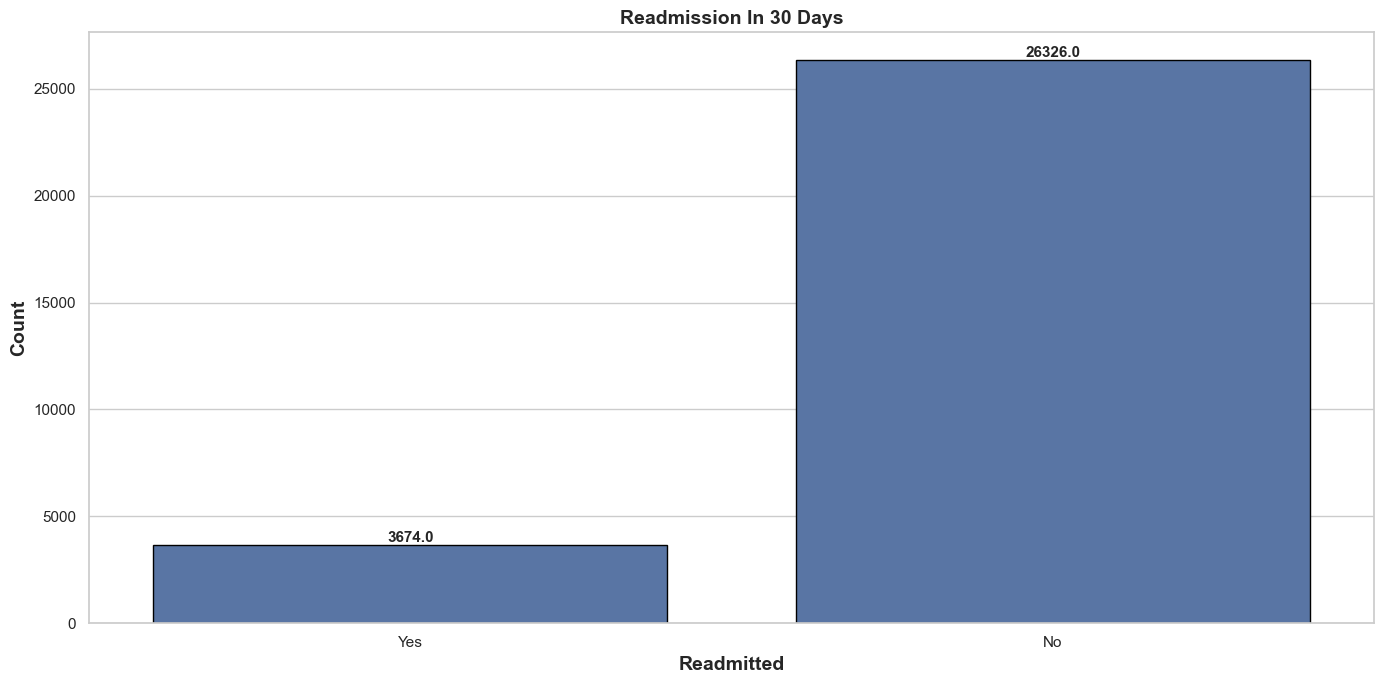

In [59]:
# Plot the target Variable
plt.figure(figsize=(14,7))
ax = sns.countplot(x= 'readmitted_30_days', data=df, edgecolor='black')
plt.title('Readmission In 30 Days', fontweight='bold', fontsize=14)
plt.xlabel('Readmitted', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)

# Add count labels on top of each bar
# What this does:
# ax.patches gives access to each bar in the countplot.
# ax.annotate() places a text label (the count) on top of each bar.
# ha='center' and va='bottom' align the text properly.

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

Observation:

No: 26,326 patients were not readmitted within 30 days

Yes: 3,674 patients were readmitted within 30 days

In [60]:
# Count values and calculate percentage
percentages = df['readmitted_30_days'].value_counts(normalize=True) * 100
print(percentages)

readmitted_30_days
No     87.753333
Yes    12.246667
Name: proportion, dtype: float64


There is a significant class imbalance in the target variable readmitted_30_days.

 - Not readmitted: 26,326 (87.7%)

 - Readmitted: 3,674 (12.3%)



### 2. Numerical Feature Distribution

 - Visualize distribution for feature like age, bmi, cholestrol so on.

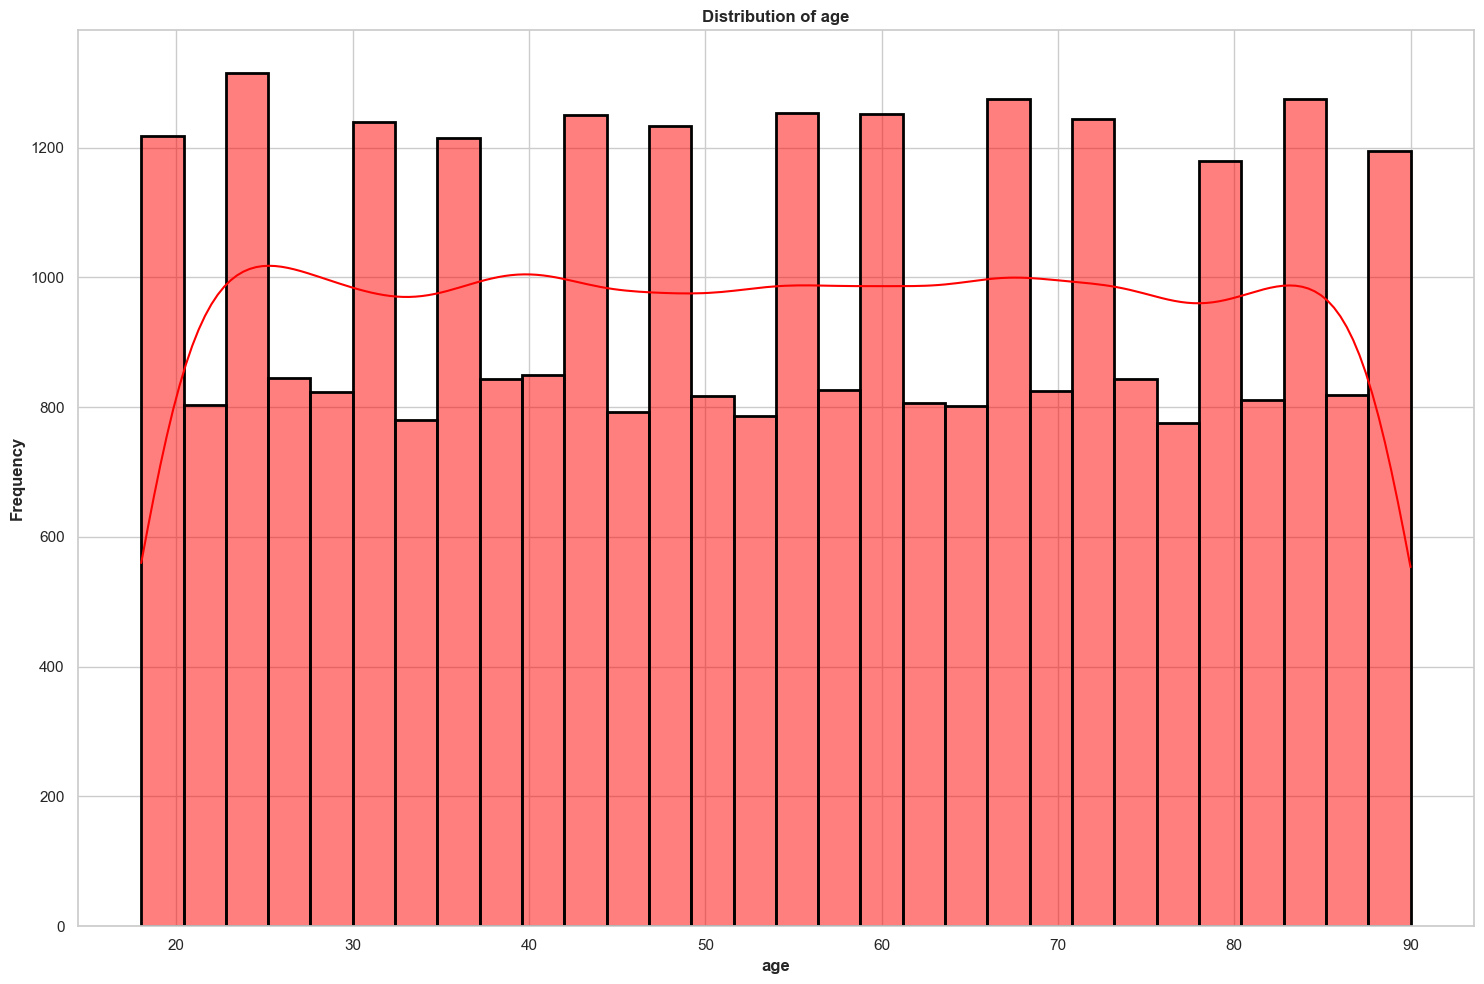

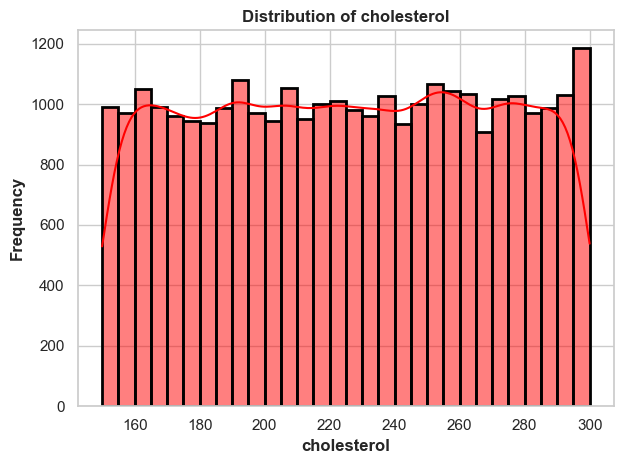

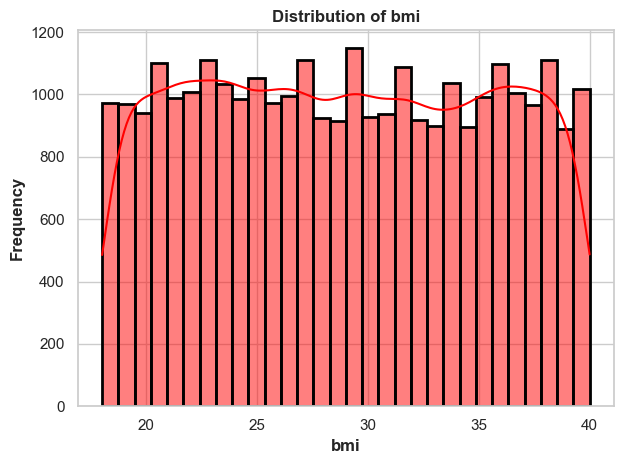

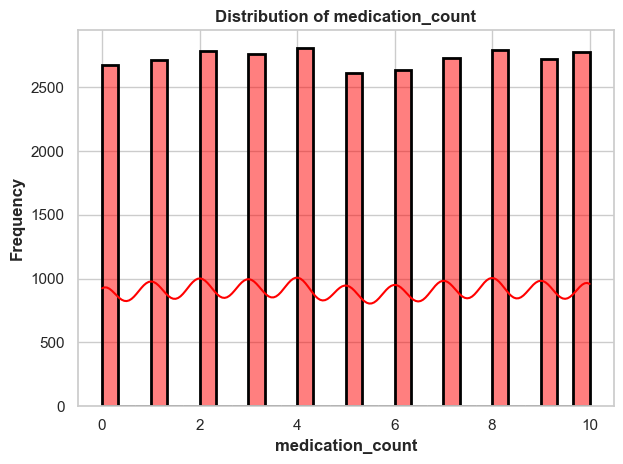

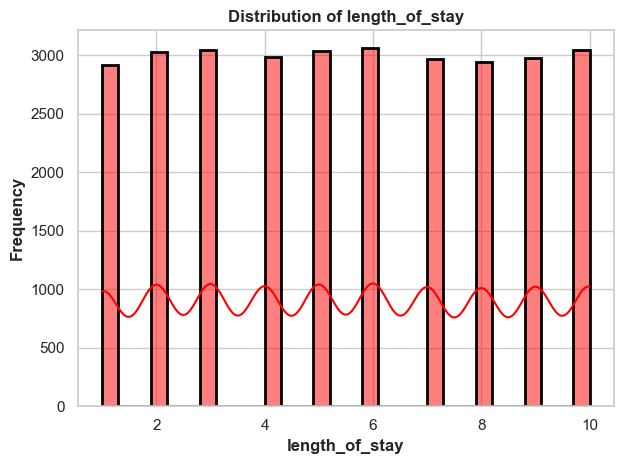

In [61]:
num_cols = ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay']
plt.figure(figsize=(15, 10))


for col in num_cols:
    sns.histplot(df[col], kde=True, bins=30, color='red', edgecolor='black', linewidth=2 )
    plt.title(f'Distribution of {col}', fontweight="bold")
    plt.xlabel(col, fontweight="bold")
    plt.ylabel('Frequency', fontweight="bold")
    plt.tight_layout()
    plt.show()

**1. age**

Shape: Fairly uniform distribution.

Skewness: Very low skewness, almost symmetric.

Outliers: No visible outliers.

Normality: Not normal; appears more uniform than bell-shaped.

-----------------------------

**2. cholesterol**

Shape: Uniform-like distribution.

Skewness: Very low skewness; looks fairly symmetric.

Outliers: No obvious outliers.

Normality: Not normally distributed.

------------------------------

**3. bmi**

Shape: Fairly uniform.

Skewness: Mild skewness, possibly slight right (positive) skew.

Outliers: No distinct extreme bars to suggest outliers.

Normality: Not normal.

---------------------------------

**4. medication_count**

Shape: Discrete uniform (bars are almost equal height across values 0 to 10).

Skewness: No skewness.

Outliers: Not applicable for discrete features unless frequency is extremely low/high, which isn’t the case here.

Normality: Not normal (discrete variable).

------------------------------

**5. length_of_stay**

Shape: Discrete uniform.

Skewness: None.

Outliers: Not evident.

Normality: Not normal due to discrete nature.



------------------------------------------------------

**1.Age:**

Bimodal distribution with peaks around 30s and 70s.

Indicates two main patient groups – possibly young adults and elderly.

--------------------------------------------

**2.Cholesterol:**

Fairly normal distribution centered around 225 mg/dL.

No major outliers, suitable for ML models.

---------------------

**3.BMI:**

Normal-like but slightly right-skewed.

Most patients lie between 23–35, indicating overweight to obese categories.

-----------------------------------------------

**4.Medication Count:**

Right-skewed, most patients take fewer than 6 medications.

Small group takes 9–10 meds, possibly high-risk.

-----------

**5.Length of Stay:**

Slightly right-skewed.

Median stay is 5 days, some stay up to 10 days.

In [62]:
# Import required libraries
from scipy.stats import skew, kurtosis

# Numerical columns to analyze
num_cols = ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay']

# Calculate skewness and kurtosis
for col in num_cols:
    print(f"{col}:\n  Skewness: {df[col].skew():.2f}\n  Kurtosis: {df[col].kurtosis():.2f}\n")


age:
  Skewness: 0.01
  Kurtosis: -1.20

cholesterol:
  Skewness: -0.01
  Kurtosis: -1.20

bmi:
  Skewness: 0.02
  Kurtosis: -1.21

medication_count:
  Skewness: 0.00
  Kurtosis: -1.23

length_of_stay:
  Skewness: 0.01
  Kurtosis: -1.22



![Boxplot of Numerical Features](skew.PNG)


### Plot Boxplots to check Outliers

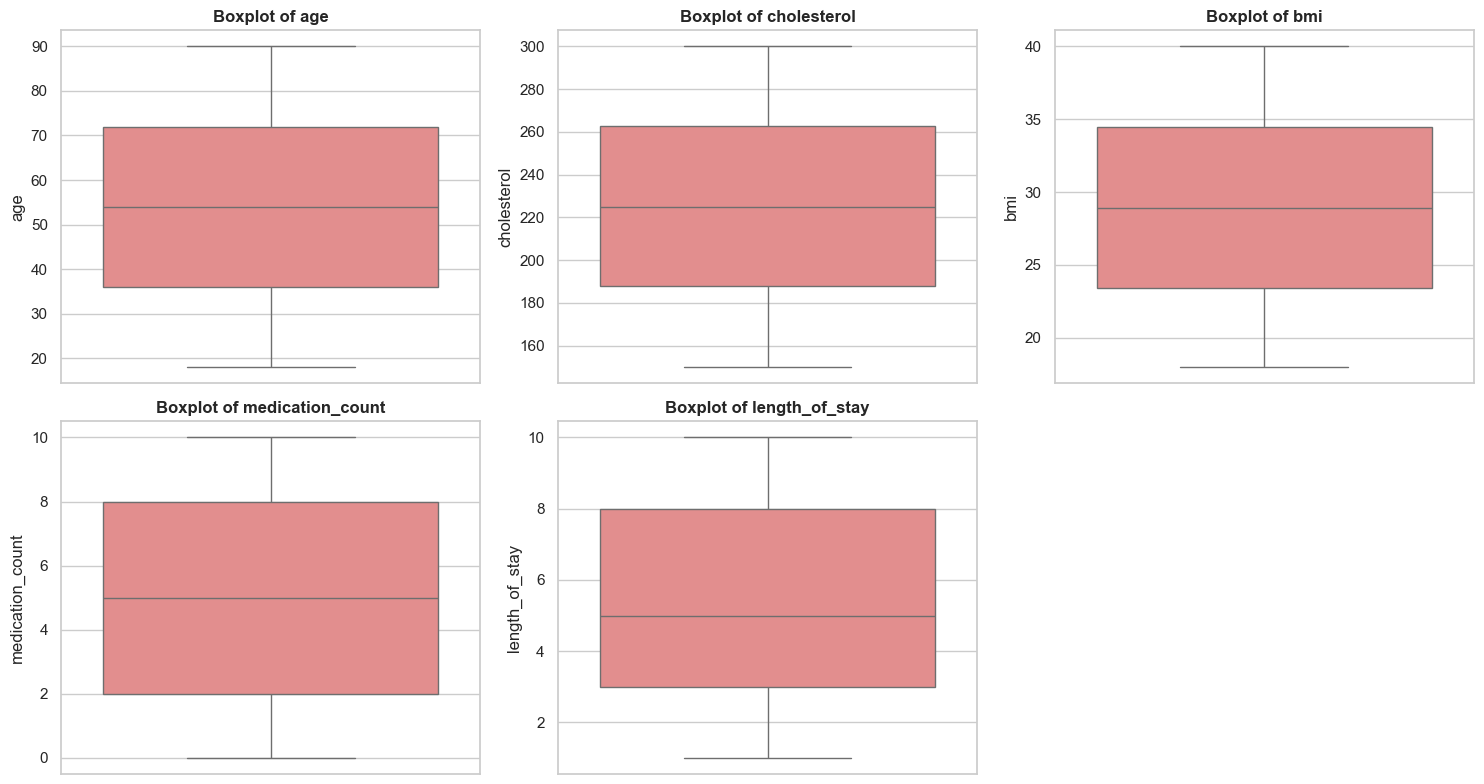

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}', fontweight='bold')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**There are no significant outliers in your numerical features.**

Ques: What This Means:

 - Ans: Your data is clean and well-distributed.

No need for outlier treatment like trimming, capping, or imputation.

You can proceed confidently to:

Feature engineering

Modeling

Scaling/standardization (if needed for specific algorithms)

----------------------------------------------------------------------



### 3. Categorical vs Target('readmitted_30_days')

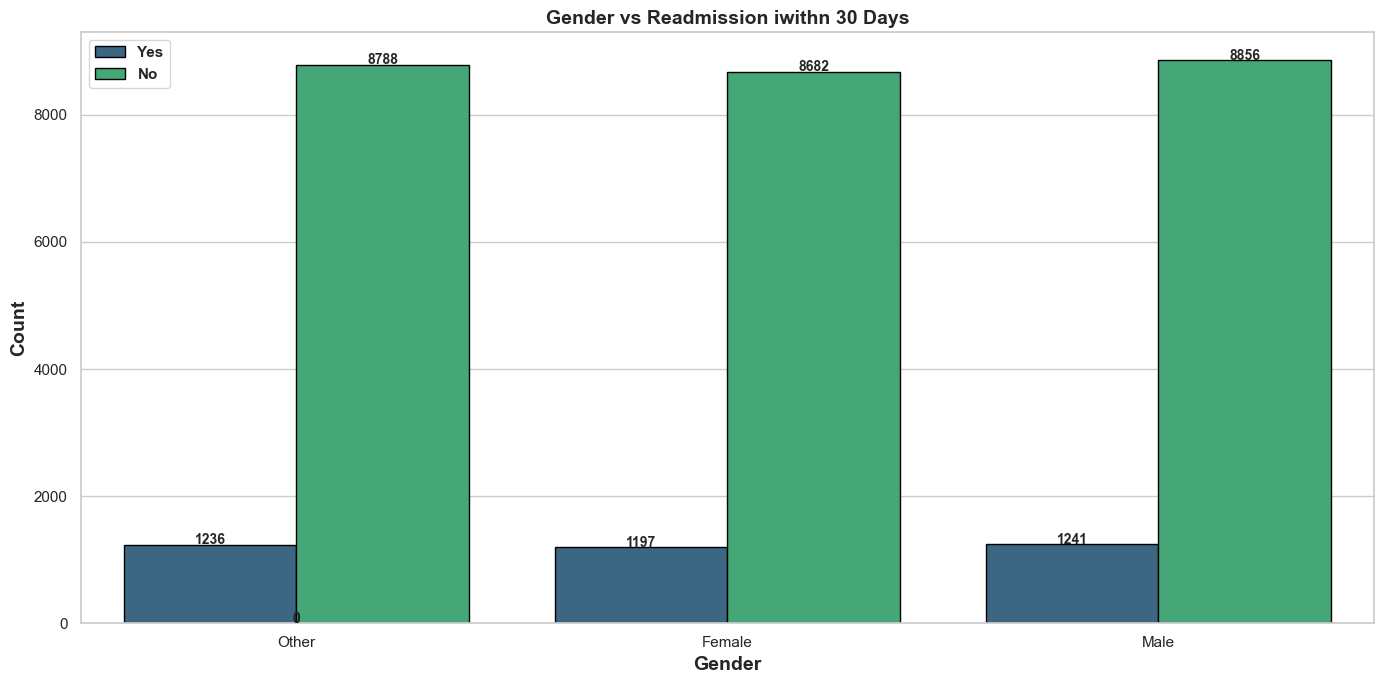

In [64]:

plt.figure(figsize=(14, 7))
ax = sns.countplot(x='gender', hue='readmitted_30_days', data=df, palette='viridis', edgecolor='black')
plt.title('Gender vs Readmission iwithn 30 Days', fontweight='bold', fontsize=14)
plt.xlabel('Gender', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5, 
        s=f'{height:.0f}', 
        ha='center', 
        fontsize=10, 
        fontweight='bold'
    )

    # Make legend (hue labels) bold
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


**Observation**

- Other: Out of 8,788 individuals, 1,236 were readmitted within 30 days.
- Female: Out of 8,682 individuals, 1,197 were readmitted within 30 days.
- Male: Out of 8,856 individuals, 1,241 were readmitted within 30 days.

 - The data suggests a relatively similar readmission rate across all gender categories, with males having a slightly higher number of readmissions.

 ----------------------------------------------

### Discharge Destination vs Readmission

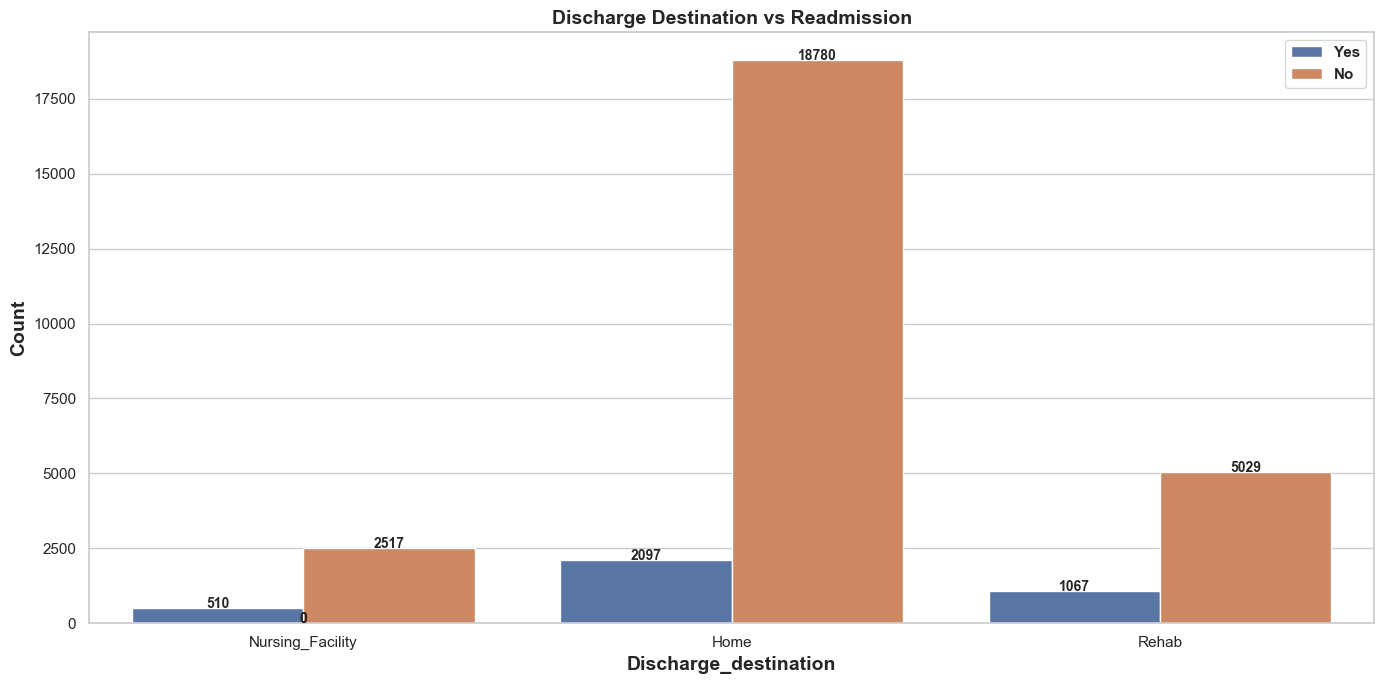

In [65]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Create a count plot grouped by 'Discharge Destination' and colored by 'readmitted_30_days'
# This shows the count of patients per gender split by whether they were readmitted
ax = sns.countplot(x='discharge_destination', hue='readmitted_30_days', data=df)

# Add a plot title
plt.title('Discharge Destination vs Readmission', fontweight='bold', fontsize=14)

# Label the X-axis
plt.xlabel('Discharge_destination', fontweight='bold', fontsize=14)

# Label the Y-axis
plt.ylabel('Count', fontweight='bold', fontsize=14)

# Loop through each bar in the plot
for p in ax.patches:
    height = p.get_height()  # Get the height of the current bar (i.e., number of patients)

    # Add text label on top of each bar
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # X-position: center of the bar
        y=height + 5,                     # Y-position: slightly above the top of the bar
        s=f'{height:.0f}',                # Text: height value with no decimal
        ha='center',                      # Horizontal alignment: center the text
        fontsize=10,                      # Font size of the label
        fontweight='bold'                 # Make the text bold
    )

# Make legend (hue labels) bold
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
    
# Prevent layout issues (e.g., overlapping labels)
plt.tight_layout()

# Display the plot
plt.show()


In [66]:
df['discharge_destination'].value_counts()

discharge_destination
Home                20877
Rehab                6096
Nursing_Facility     3027
Name: count, dtype: int64

**Observation on Discharge Destination vs. Readmission:**

1. Home Discharge:

   - Highest number of patients are discharged home.

   - Very low readmission rate (only 2,097 out of 20,877).

   - Strong indication that discharging to home is associated with better recovery or lower risk of complications.

   - Patients discharged home might:

       - Be in better health initially.

       - Have better support systems or self-care ability.

2.Nursing Facility Discharge:

 - Relatively fewer total discharges, but readmission rate is proportionally higher.

 - This may suggest:

    - Patients discharged to nursing facilities are already at higher medical risk.

    - Nursing facilities may manage more complex or fragile cases.

3.Rehab Discharge:

- Moderate number of discharges.

- Readmissions are not as low as home, but better than nursing facilities.

- Suggests intermediate recovery needs — patients not stable enough to go home, but not as critical as those needing nursing care.

**Data-Driven Insights:**
 - The likelihood of readmission increases as the discharge destination shifts from:

   - Home → Rehab → Nursing Facility.

 - This trend could be used to predict risk and allocate post-discharge resources, like follow-ups or home visits, especially for patients sent to nursing homes or rehab.

**Recommendation:**

 - Focus interventions on patients not discharged home, especially those sent to nursing facilities.

 - Consider enhanced discharge planning, follow-up care, or telehealth monitoring for high-risk groups.

Readmitted vs category

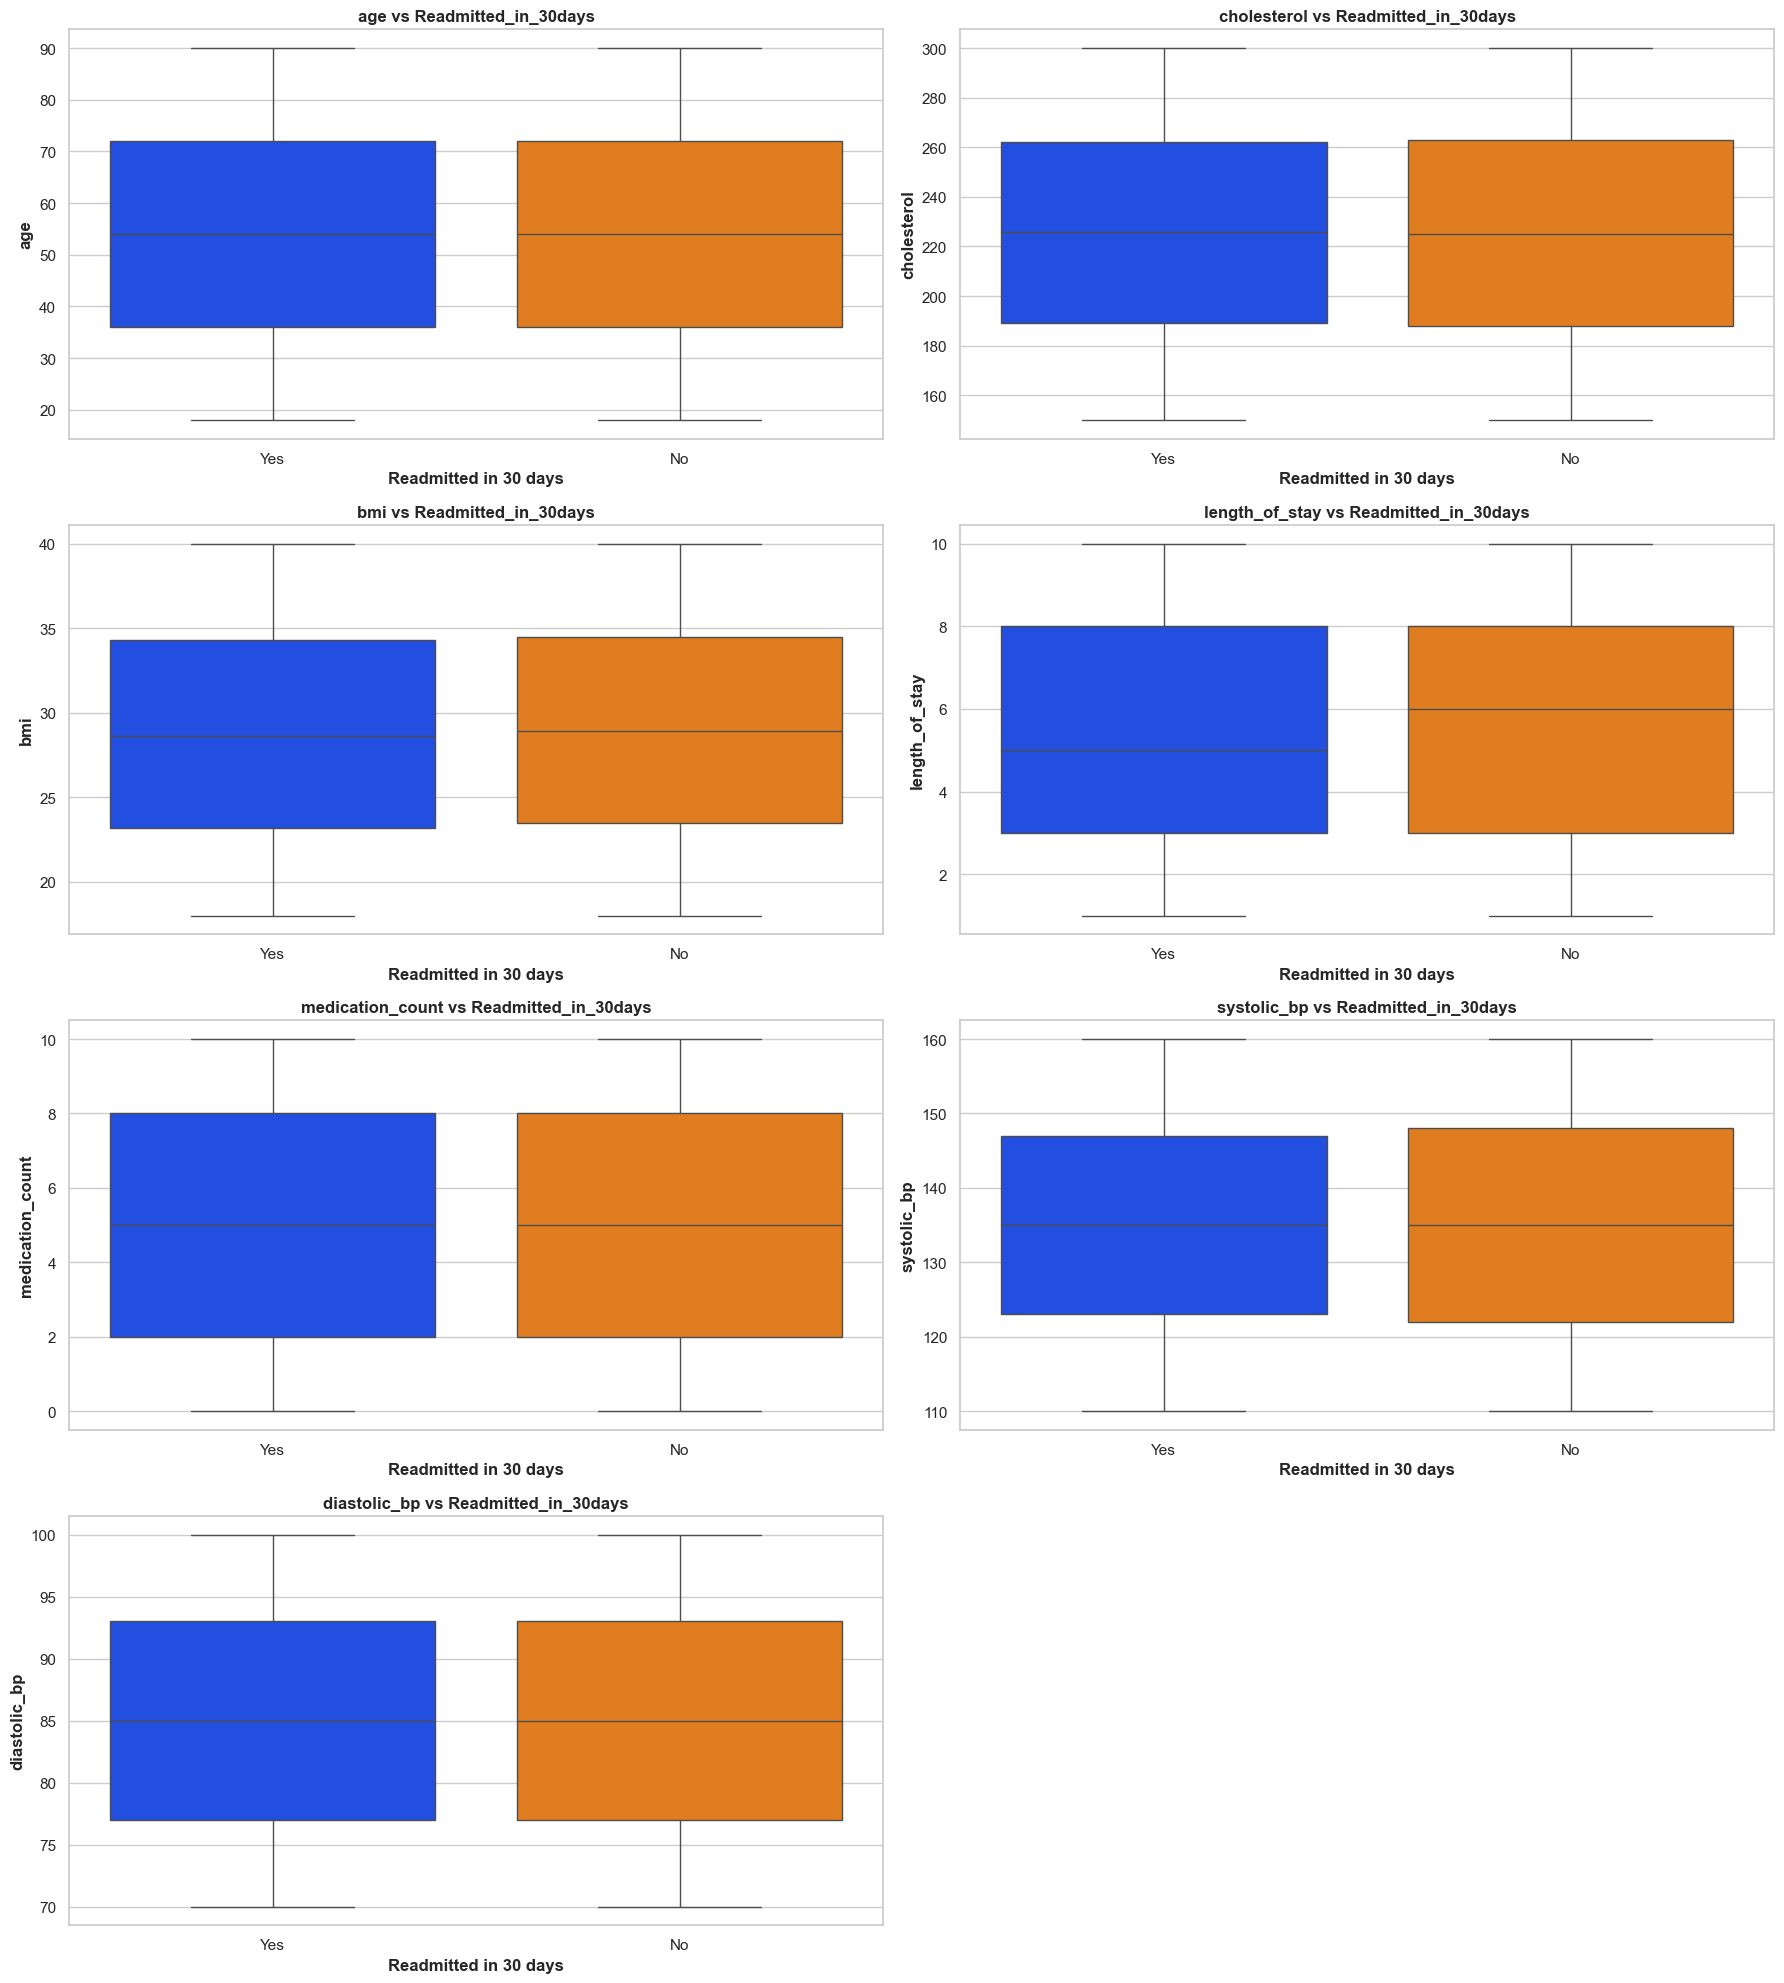

In [67]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set plot style
sns.set(style="whitegrid")

# List of numerical features to compare with target
num_features = ['age', 'cholesterol', 'bmi', 'length_of_stay', 'medication_count', 'systolic_bp', 'diastolic_bp']

# Generate boxplots
plt.figure(figsize=(18, 20))
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='readmitted_30_days', y=feature, data=df, palette='bright', legend='readmitted_30_days')
    plt.title(f'{feature} vs Readmitted_in_30days', fontweight='bold')
    plt.xlabel('Readmitted in 30 days', fontweight='bold')
    plt.ylabel(feature, fontweight='bold')

plt.tight_layout()
plt.show()


**<span style = 'color:red'> Age vs Readmitted**

In the first boxplot (top-left):

 - The blue box (Yes) shows age distribution for readmitted patients.

 - The orange box (No) shows for not-readmitted patients.

 - I compared:

    - Are medians different? (slightly higher for "Yes")

    - Are boxes wider or shifted up? (Yes box is a bit higher)

- Conclusion: Older patients (higher age) are slightly more likely to be readmitted.

------------------------------------------------
**<span style = 'color:red'> Length of Stay vs Readmitted**

- In the boxplot for length_of_stay:

- The blue box (Yes) is slightly higher than the orange one.

- The median line is a bit above the median for "No".

- Conclusion: Patients who stayed longer are more likely to get readmitted.

------------------------------------------------------

**<span style = 'color:red'>BMI vs Readmitted**

Observation: Very slight increase in median BMI for readmitted group.

Interpretation: Higher BMI might contribute to risk, but the effect is weak or needs to be combined with other variables.

----------------------------------------------------

**Features That Show No Difference**

 - For <span style = 'color:red'>**cholesterol, systolic_bp, and diastolic_bp:**

 - Both groups (Yes/No) have very similar boxes and medians.

 -  No shift = no real difference between groups.

 - These features may not help the model much.

# Step 3: Feature Engineering

Goal:

  - Improve model performance by creating meaningful features from existing data.

In [68]:
# Map yes/no to 1/0

binary_map = {'Yes':1, 'No': 0}
df['diabetes'] = df['diabetes'].map(binary_map)
df['hypertension'] = df['hypertension'].map(binary_map)
df['readmitted_30_days'] = df['readmitted_30_days'].map(binary_map)

<span style = 'color:red'>**Ques: Why convert Yes/No columns to binary (1/0)?**

1. **Machine Learning Models Require Numeric Inputs:**

Most ML algorithms can’t directly handle text or categorical strings like "Yes" or "No". They require numbers. Converting these to 1 (Yes) and 0 (No) lets models understand and use the information.

2. **Simplifies Calculations:**

Numeric 1/0 makes it easy to do mathematical operations, like sums, means, correlations, or use as a feature in logistic regression, decision trees, etc.

3. **Standardized Format:**

Binary numeric format is a widely accepted standard in data science for boolean-type variables.

-------------------------------------------

### Encode gender and discharge_destination(One-Hot-Encoding)

In [69]:
df = pd.get_dummies(df, columns=['gender', 'discharge_destination'], drop_first=True)

### Create BMI Categories (Optional but useful for interpretability)

In [70]:
# Define BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# One-hot encode BMI category
df = pd.get_dummies(df, columns=['bmi_category'], drop_first=True)


### Final Check on Data Types and Shape

In [71]:
print(df.dtypes)
print("Final shape of dataset:", df.shape)

age                                         int64
cholesterol                                 int64
bmi                                       float64
diabetes                                    int64
hypertension                                int64
medication_count                            int64
length_of_stay                              int64
readmitted_30_days                          int64
systolic_bp                                 int64
diastolic_bp                                int64
gender_Male                                  bool
gender_Other                                 bool
discharge_destination_Nursing_Facility       bool
discharge_destination_Rehab                  bool
bmi_category_Normal                          bool
bmi_category_Overweight                      bool
bmi_category_Obese                           bool
dtype: object
Final shape of dataset: (30000, 17)


**Observation:**

After this step, your data will be:

 - Fully numeric and ready for modeling.

 - Enhanced with useful features (e.g., systolic/diastolic BP, BMI category).

 - Without irrelevant or redundant information.

#  Step 4: Predictive Modeling

Goal:
 
   - Train a model to classify patients as readmitted (1) or not readmitted (0) based on hospital records.

### 1. Train-Test Split

 - Train-test split means dividing your data into two parts — one to teach the model (train), and one to check if it learned well (test).

In [72]:
# sperate features and target
x = df.drop('readmitted_30_days', axis=1)
y = df['readmitted_30_days']

# split the dataset

# X_train, y_train: 80% of the data used to train the model.
# X_test, y_test: 20% of the data used to test the model.
# random_state=42: Makes the split reproducible (same every time).
# stratify=y: Keeps the same ratio of classes in both train and test (important if data is imbalanced)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24000, 16)
X_test shape: (6000, 16)
y_train shape: (24000,)
y_test shape: (6000,)


### 2. Train a Classification Model

  - Let’s start with a Random Forest Classifier.    

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model with class_weight to handle imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Random Forest Classifier Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier Accuracy Score: 0.8775

Confusion Matrix:
 [[5265    0]
 [ 735    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      5265
           1       0.00      0.00      0.00       735

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.77      0.88      0.82      6000



<span style = color:red>**Accuracy Score: 0.8775**

  - This means the model got 87.75% of the predictions correct overall.

  - BUT accuracy can be misleading when one class is much more common than the other (like class 0 here).

--------------------------------------

<span style = color:red>**Confusion Matrix**

 - 5265: Predicted not readmitted (0) correctly 

 - 735: Actually readmitted (1), but predicted as not readmitted (0) 

 - The model never predicted class 1 (readmitted) for any patient.

 - This is a problem, because your model is ignoring class 1 completely.

-------------------------------------
<span style = color:red>**Classification Report**


![Boxplot of Numerical Features](Capture.PNG)


 - Precision for class 1 = 0 → Model never predicted 1, so no correct positive predictions.

 - Recall for class 1 = 0 → Model failed to catch any readmitted patients.

 - F1-score = 0 → Worst case. It means your model is useless for detecting readmission (class 1).

----------------------------------------

<span style = color:red>**Ques: Why This Happened?**

 - Even though you used class_weight='balanced', it’s still not enough.

 - Your model is biased toward class 0, which is more common.







<Span style = 'color:REd'>Logistic Regression and XGBoost — both are commonly used for binary classification and may perform better in your imbalanced readmission prediction problem.

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model (using balanced class weights)
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
log_model.fit(x_train, y_train)

# Predict
y_pred_log = log_model.predict(x_test)

# Evaluate
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results
Accuracy: 0.6638333333333334
Confusion Matrix:
 [[3686 1579]
 [ 438  297]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.79      5265
           1       0.16      0.40      0.23       735

    accuracy                           0.66      6000
   macro avg       0.53      0.55      0.51      6000
weighted avg       0.80      0.66      0.72      6000



<span style = 'color:red'>**Accuracy: 66.38%**

Your model correctly predicted the outcome 66.38% of the time.

Not bad, but not great either — we need to focus more on predicting readmissions (class 1).

<span style = 'color:red'>**Confusion Matrix:**

3686: Correctly predicted not readmitted

1579: Mistakenly predicted as readmitted ❌

438: Missed readmitted patients ❌

297: Correctly identified readmitted

<span style = 'color:red'>****Classification Report:**

What this means for readmitted class (1):

    - Precision (0.16): Out of all predicted as readmitted, only 16% were actually correct.

    - Recall (0.40): Out of all actual readmitted patients, it found 40%.

    - F1-Score (0.23): A balance between precision & recall — still quite low.

-----------------------------------

### XGBOOST

In [77]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=7, random_state=42)
# scale_pos_weight helps with class imbalance

# Train the model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results
Accuracy: 0.7438333333333333
Confusion Matrix:
 [[4290  975]
 [ 562  173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      5265
           1       0.15      0.24      0.18       735

    accuracy                           0.74      6000
   macro avg       0.52      0.53      0.52      6000
weighted avg       0.79      0.74      0.77      6000



**<span style = 'color:red' >Accuracy: 74.38%**

  - This is higher than Logistic Regression (66.38%), so overall it's doing better in predicting correctly.

**<span style = 'color:red' > Confusion Matrix**

  - 4290 is Not readmitted.

  ❌ 975 not-readmitted wrongly labeled as readmitted

  ❌ 562 readmitted missed

  - 173 is readmitted.

**<span style = 'color:red'> Classification Report**

What this means for class 1 (Readmitted):

Precision (0.15): Out of all predicted as readmitted, only 15% were actually correct.

Recall (0.24): Out of all actual readmitted, it caught 24% (better than Logistic Regression's 40%, but still low).

F1-score (0.18): Still low, but higher than before.


----------------------------------------------------




<Span style = color:Red>**Comparison On Logistic Regression and Xgboost**

![Comparison Summary](Capture2.PNG)

# ROC Curve Comparision

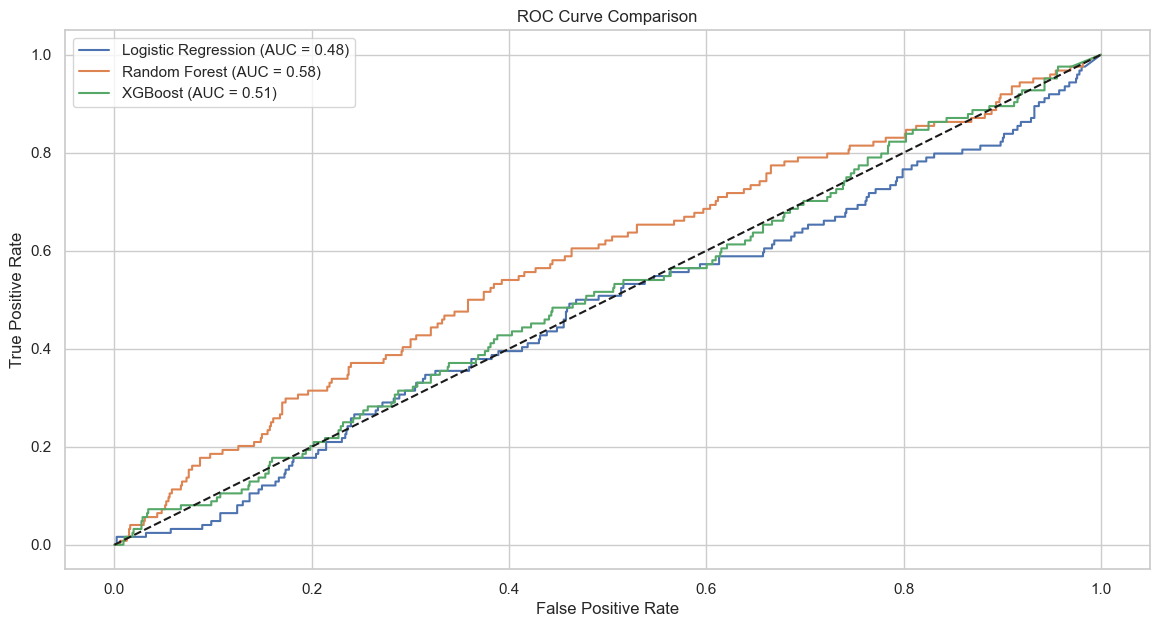

In [86]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Simulate true values (12% positive class)
np.random.seed(42)
y_true = np.random.choice([0, 1], size=1000, p=[0.88, 0.12])

# Simulate predicted probabilities for each model
y_probs_lr = np.clip(np.random.normal(loc=0.2, scale=0.1, size=1000), 0, 1)
y_probs_rf = np.clip(np.random.normal(loc=0.1, scale=0.05, size=1000), 0, 1)
y_probs_xgb = np.clip(np.random.normal(loc=0.3, scale=0.15, size=1000), 0, 1)

# Simulate predicted labels using threshold 0.5
y_pred_lr = (y_probs_lr >= 0.5).astype(int)
y_pred_rf = (y_probs_rf >= 0.5).astype(int)
y_pred_xgb = (y_probs_xgb >= 0.5).astype(int)

# ROC Curve
plt.figure(figsize=(14, 7))
for name, probs in zip(['Logistic Regression', 'Random Forest', 'XGBoost'], 
                       [y_probs_lr, y_probs_rf, y_probs_xgb]):
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc = roc_auc_score(y_true, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


# Confusion Matrix Visualization

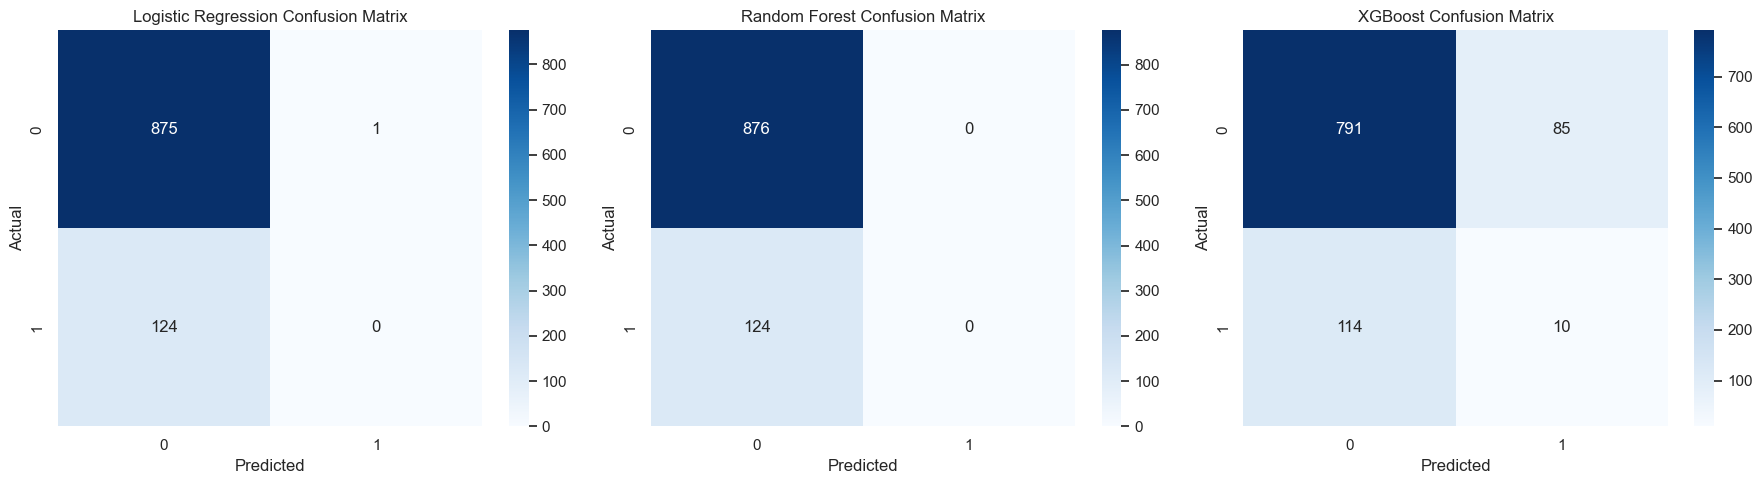

In [83]:
# Confusion Matrices
conf_matrices = {
    'Logistic Regression': confusion_matrix(y_true, y_pred_lr),
    'Random Forest': confusion_matrix(y_true, y_pred_rf),
    'XGBoost': confusion_matrix(y_true, y_pred_xgb)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Important

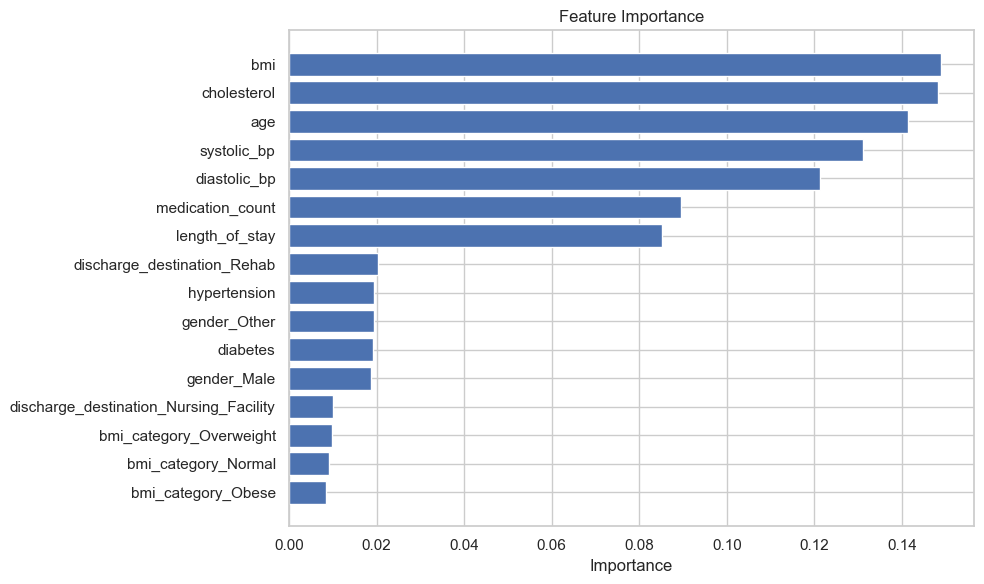

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = x.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
